In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/dataset/train')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/XX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/yy.pickle","rb")
y = pickle.load(pickle_in)


In [ ]:
print(len(X)+len(y))

7610


In [ ]:
X = X/255.0

In [ ]:
print(X[0])

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)


Epoch 1/5
84/84 [==============================] - 14s 155ms/step - loss: 0.2423 - accuracy: 0.8956 - val_loss: 0.0861 - val_accuracy: 0.9632
Epoch 2/5
84/84 [==============================] - 13s 155ms/step - loss: 0.0981 - accuracy: 0.9609 - val_loss: 0.0620 - val_accuracy: 0.9790
Epoch 3/5
84/84 [==============================] - 13s 158ms/step - loss: 0.0704 - accuracy: 0.9692 - val_loss: 0.1172 - val_accuracy: 0.9606
Epoch 4/5
84/84 [==============================] - 13s 152ms/step - loss: 0.0616 - accuracy: 0.9782 - val_loss: 0.0478 - val_accuracy: 0.9842
Epoch 5/5
84/84 [==============================] - 13s 161ms/step - loss: 0.0461 - accuracy: 0.9842 - val_loss: 0.0398 - val_accuracy: 0.9860


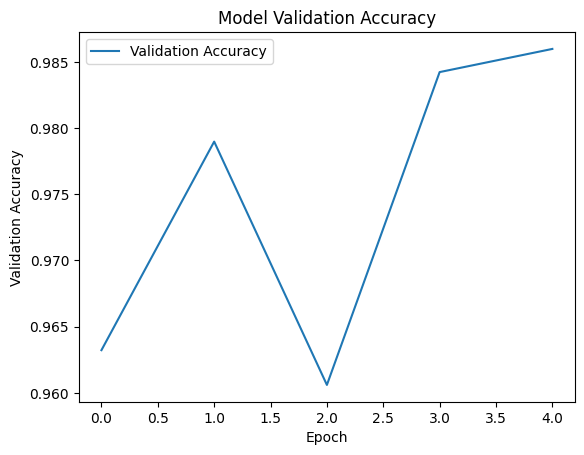

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'], loc='upper left')
plt.show()

In [ ]:
model.save('onefruit-cnn.model')